=== Augmentation Importance ===
fliplr     0.9594
scale      0.1122
mosaic     0.0186
mixup      0.0000
degrees    0.0000
hsv_s     -0.0124
dtype: float64

=== Optimiser HP Importance ===
momentum        1.7363
lr0            -0.0022
lrf            -0.0087
weight_decay   -0.0372
dtype: float64


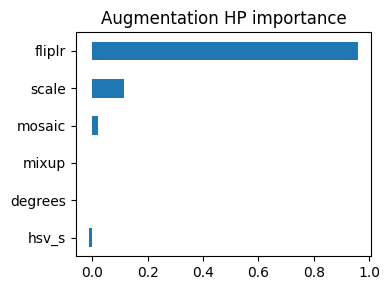

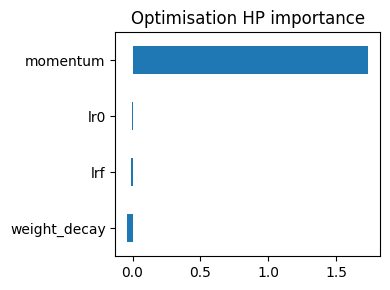

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


metric_col = "fitness"

aug_df = pd.read_csv("C:/Users/joons/workspace/final_project/runs/tuned_aug_auto/aug_auto/tune_results.csv")
ga_df  = pd.read_csv("C:/Users/joons/workspace/final_project/runs/tuned_ga/tuned_ga/tune_results.csv")


aug_hp_cols = ["mosaic","mixup","hsv_s","degrees","scale","fliplr"]
ga_hp_cols  = ["lr0","momentum","weight_decay","lrf"]


aug_df = aug_df[aug_hp_cols + [metric_col]].dropna()
ga_df  = ga_df [ga_hp_cols  + [metric_col]].dropna()
ga_df = ga_df[ga_df["fitness"] > 0].copy()
aug_df = aug_df[aug_df["fitness"] > 0].copy()

def get_importance(df, hp_cols, metric):
    X = df[hp_cols]
    y = df[metric]
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=42)
    rf.fit(X_tr, y_tr)
    imp = permutation_importance(rf, X_val, y_val, n_repeats=20, random_state=42, n_jobs=-1)
    return pd.Series(imp.importances_mean, index=hp_cols).sort_values(ascending=False)

aug_imp = get_importance(aug_df, aug_hp_cols, metric_col)
ga_imp  = get_importance(ga_df,  ga_hp_cols,  metric_col)

plt.figure(figsize=(4,3))
aug_imp.plot(kind="barh")
plt.title("Augmentation HP importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("aug_importance.png", dpi=200)

plt.figure(figsize=(4,3))
ga_imp.plot(kind="barh")
plt.title("Optimisation HP importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("ga_importance.png", dpi=200)

print("=== Augmentation Importance ===")
print(aug_imp.round(4))
print("\n=== Optimiser HP Importance ===")
print(ga_imp.round(4))
